In [9]:
import numpy as np
import matplotlib.pyplot as plt

Fourier Series

https://databookuw.com/
https://databookuw.com/databook.pdf
https://www.youtube.com/watch?v=dZrShAGqT44&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC

This code demonstrates how to approximate a periodic function (in this case a hat function) using a defined number (r) of sum of cosines of higher frequencies and sines of higher frequencies.

To do this, calcuate the inner product of your function with the cosine and sine waves.


### Fourier Series of a Triangular (“Hat”) Function on $[-\pi,\pi]$

This cell constructs a **hat (triangular)** function on $[-\pi,\pi]$ and incrementally builds its **Fourier series** approximation, plotting the partial sums $N=1,2,\dots,r$.

---

#### 1) Domain and Signal

- **Domain:** $[-\pi,\pi]$ sampled with step $\Delta x = 0.001$.  
- **Signal $f(x)$:** A piecewise-linear “hat”:
  - Ramps **up** over the second quarter of samples,
  - Ramps **down** over the third quarter,
  - Zero elsewhere.

This produces a continuous, piecewise-linear pulse centered in the interval. Because $f$ is continuous but not differentiable at the “knee” points, its Fourier series converges faster than a square wave (no jump discontinuities), but still shows visible high-frequency ripple in derivatives.

---

#### 2) Fourier Series Form (Period $2\pi$)

Over $[-\pi,\pi]$ with period $2\pi$, the (non-orthonormal) Fourier series is
$$
f(x) \;=\; \frac{a_0}{2}
\;+\; \sum_{k=1}^{\infty}\Big[a_k\cos(kx) + b_k\sin(kx)\Big],
$$
with the **standard** coefficient formulas
$$
a_0 \;=\; \frac{1}{\pi}\int_{-\pi}^{\pi} f(x)\,dx, \qquad
a_k \;=\; \frac{1}{\pi}\int_{-\pi}^{\pi} f(x)\cos(kx)\,dx,\qquad
b_k \;=\; \frac{1}{\pi}\int_{-\pi}^{\pi} f(x)\sin(kx)\,dx.
$$

The code numerically approximates these integrals by Riemann sums over the grid.

---

#### 3) What the Code Does

- Computes $A_0=\sum f\,\Delta x$ and sets the running series $f_{\text{FS}} \leftarrow A_0/2$.
- For $k=1,\dots,r$:
  - Accumulates
    $$
    A_k \approx \sum f(x)\cos(kx)\,\Delta x,\quad
    B_k \approx \sum f(x)\sin(kx)\,\Delta x,
    $$
  - Updates $f_{\text{FS}} \leftarrow f_{\text{FS}} + A_k\cos(kx) + B_k\sin(kx)$,
  - Plots the current partial sum $N=k$.

A color cycle is used so each partial sum is visually distinct; a legend is placed outside the axes.

---

#### 4) **Normalization Note (Important)**

In the **standard** formulas above, each coefficient has a factor $1/\pi$.  
The code as written computes the *raw inner products* (missing the $1/\pi$ factor). To make the reconstruction **quantitatively correct**, scale once by $1/\pi$ (i.e., divide all computed coefficients—including $A_0$—by $\pi$):

- Use
  $$
  a_0 \approx \frac{1}{\pi}\sum f\,\Delta x,\quad
  a_k \approx \frac{1}{\pi}\sum f\cos(kx)\,\Delta x,\quad
  b_k \approx \frac{1}{\pi}\sum f\sin(kx)\,\Delta x.
  $$
- Then reconstruct with $f_{\text{FS}} = \dfrac{a_0}{2} + \sum_{k=1}^r \big[a_k\cos(kx) + b_k\sin(kx)\big]$.

If you prefer to keep the code structure unchanged, you can equivalently divide **once at the end**:
$$
f_{\text{FS}} \leftarrow \frac{1}{\pi}\,f_{\text{FS}}.
$$

---

#### 5) Convergence Behavior (No Gibbs Overshoot)

Because the hat function is **continuous** (no jumps), you should **not** see the classic Gibbs overshoot (~9%) that appears for discontinuities. Instead:
- The partial sums converge **uniformly** on $[-\pi,\pi]$ (Weierstrass/M-test applies to continuous, piecewise $C^1$ periodic functions).
- Corners (non-differentiable points) limit smoothness, so higher $k$ content decays as $O(1/k^2)$ for a triangular wave, yielding visibly faster convergence than a square wave’s $O(1/k)$.

---

#### 6) Practical Tips

- Increasing $r$ (number of terms) tightens the approximation across the interval.  
- If you see amplitude mismatch, double-check the **$1/\pi$** scaling described above.  
- For numerical stability, keep $\Delta x$ reasonably small (your $\Delta x=0.001$ is fine).

---

**References (for theory):**  
- A. V. Oppenheim & A. S. Willsky, *Signals and Systems*, 2e, Ch. 4 (Fourier Series).  
- E. Stein & R. Shakarchi, *Fourier Analysis: An Introduction*, Princeton Lectures in Analysis I, Ch. 1–2.


A0 = 0.501


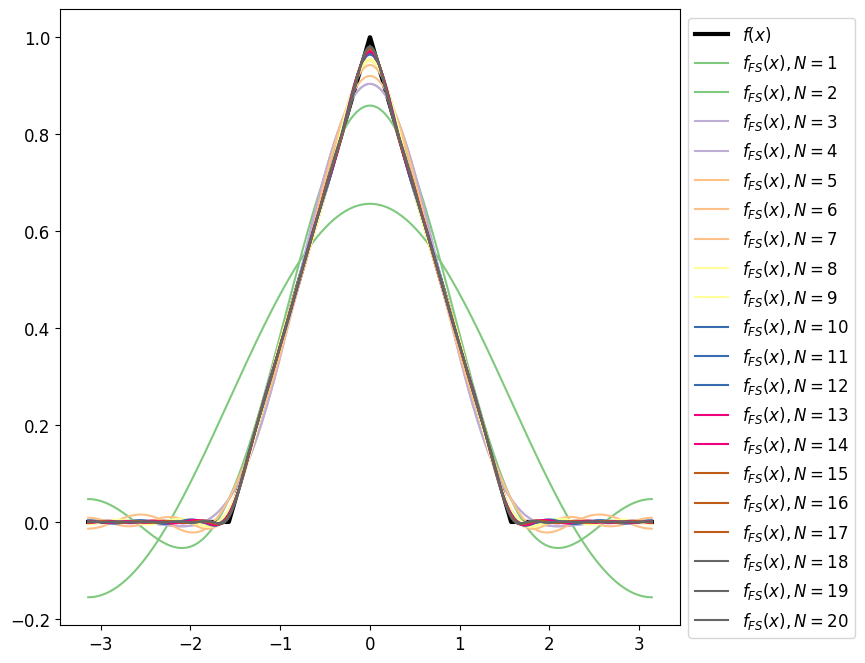

In [10]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 12})

# Define domain
dx = 0.001 
L = np.pi
x = L * np.arange(-1+dx, 1+dx, dx) # domain is -pi to pi, with dx = 0.001
n = len(x)
nquart = int(np.floor(n/4))  # quarter of the length of the array

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n) * np.arange(1, nquart + 1) # second quarter - ramp up
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n) * np.arange(0, nquart) # third quarter - ramp down

fig, ax = plt.subplots()
ax.plot(x, f, '-', color='k', linewidth=3, label='$f(x)$')

# Compute the Fourier series
name = "Accent"
cmap = plt.get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = np.sum(f * np.ones_like(x)) * dx # 0th mode, cosine(0), f(x)=1
print(f"A0 = {A0:.3f}")

fFS = A0 / 2

r = 20 # number of Fourier series terms


A = np.zeros(r)
B = np.zeros(r)
for k in range(r):
    A[k] = np.sum(f * np.cos(np.pi * (k+1) * x / L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi * (k+1) * x / L)) * dx # Inner product
    fFS += A[k] * np.cos(np.pi * (k+1) * x / L) + B[k] * np.sin(np.pi * (k+1) * x / L)
    ax.plot(x, fFS, '-', label=f'$f_{{FS}}(x), N={k+1}$', color=plt.get_cmap(name)((k+1)/20))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### Fourier Coefficient Amplitudes and Reconstruction Error

This cell computes the **Fourier coefficients** of a function, tracks the **reconstruction error** as more terms are added, and determines how many terms are needed to achieve a target accuracy.

---

#### 1) Initialization
- Start with the DC term:
  $$
  f_{\text{FS}}(x) \;=\; \frac{A_0}{2}.
  $$
- Arrays are allocated for cosine coefficients $A_k$, sine coefficients $B_k$, and the relative error $\text{ERR}[k]$.

The relative error is defined as:
$$
\text{ERR}[k] = \frac{\|f - f_{\text{FS}}\|_2}{\|f\|_2},
$$
where $\|\cdot\|_2$ denotes the Euclidean (L2) norm.

---

#### 2) Iterative Coefficient Computation
For each Fourier mode $k=1,\dots,k_{\max}-1$:
- Compute coefficients:
  $$
  A_k \approx \sum f(x)\cos\!\left(\tfrac{k\pi x}{L}\right)\,\Delta x,
  \qquad
  B_k \approx \sum f(x)\sin\!\left(\tfrac{k\pi x}{L}\right)\,\Delta x.
  $$
- Update the Fourier series approximation:
  $$
  f_{\text{FS}} \;\leftarrow\; f_{\text{FS}} + A_k\cos\!\left(\tfrac{k\pi x}{L}\right) + B_k\sin\!\left(\tfrac{k\pi x}{L}\right).
  $$
- Recompute the reconstruction error $\text{ERR}[k]$.

---

#### 3) Thresholding
To decide how many modes are needed:
- The error sequence is scaled by $\sqrt{k_{\max}}$.
- The **median** of the scaled errors is taken.
- A constant factor $\tfrac{4}{\sqrt{3}}$ is applied:
  $$
  \text{thresh} = \text{median}\!\left(\text{ERR} \cdot \sqrt{k_{\max}}\right) \cdot \frac{4}{\sqrt{3}}.
  $$
- Optionally, the threshold can be reduced (e.g., `thresh *= 0.1`) to enforce stricter accuracy.

Finally:
- The cutoff $r$ is chosen as the **largest mode** such that $\text{ERR}[k] > \text{thresh}$.
- This gives the **minimum number of Fourier modes** required before the reconstruction error falls below the tolerance.

---

#### 4) Visualization
Two diagnostic plots are generated:
1. **Fourier coefficients** $A_k$ on a log scale, with the chosen mode $r$ highlighted.
2. **Error decay** $\text{ERR}[k]$ on a log scale, with the cutoff point $r$ marked.

---

#### 5) Interpretation
- The error plot shows how quickly the Fourier series converges for the given function.
- Smooth functions have coefficients $A_k,B_k$ that decay rapidly, leading to faster error reduction.
- The cutoff $r$ provides a practical guideline for truncating the Fourier series without significant loss of accuracy.


Threshold for error: 0.032
Number of Fourier modes needed: 5


Text(0.5, 1.0, 'Error')

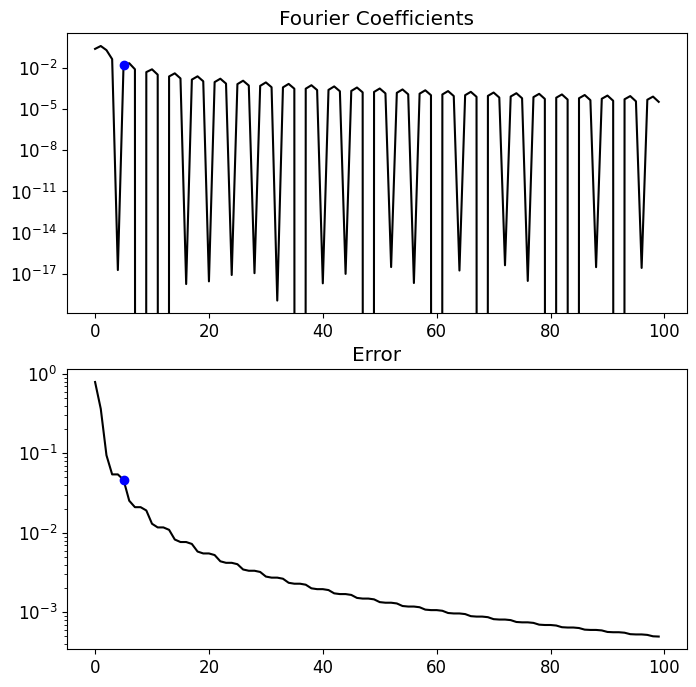

In [5]:
## Plot amplitudes
fFS = (A0/2) * np.ones_like(f)
kmax = 100
A = np.zeros(kmax)
B = np.zeros(kmax)
ERR = np.zeros(kmax) # array of reconstruction errors for each Fourier mode

A[0] = A0 / 2
ERR[0] = np.linalg.norm(f - fFS) / np.linalg.norm(f)
for k in range(1, kmax):
    A[k] = np.sum(f * np.cos(k * np.pi * x / L)) * dx
    B[k] = np.sum(f * np.sin(k * np.pi * x / L)) * dx
    fFS += A[k] * np.cos(k * np.pi * x / L) + B[k] * np.sin(k * np.pi * x / L)
    ERR[k] = np.linalg.norm(f - fFS) / np.linalg.norm(f)

# Thresholdused to determine how many Fourier modes are needed before the error 
# drops below a certain level, helping to select an appropriate cutoff for the series.
# np.sqrt(kmax) scales the error array by the square root of the number of modes
# np.median(...) finds the median of the scaled errors
# The result is multiplied by (4/np.sqrt(3)) for further scaling
thresh = np.median(ERR * np.sqrt(kmax)) * (4/np.sqrt(3))

# thresh *= 0.1 # Require smaller error

print(f"Threshold for error: {thresh:.3f}")
r = np.max(np.where(ERR > thresh))
print(f"Number of Fourier modes needed: {r}")

fig, axs = plt.subplots(2,1)
axs[0].semilogy(np.arange(kmax), A, color='k')
axs[0].semilogy(r, A[r], 'o', color='b')
plt.sca(axs[0])
plt.title('Fourier Coefficients')

axs[1].semilogy(np.arange(kmax), ERR, color='k')
axs[1].semilogy(r, ERR[r], 'o', color='b')
plt.sca(axs[1])
plt.title('Error')
